## Problem 1: Visualize a static map (8 points)

Create a static map using the skills you leared in [lesson 5: static maps](https://automating-gis-processes.github.io/site/notebooks/L5/static_maps.html). The map should contain multiple layers of data (at least two different data sets), and you should pay attention to the classification and visualization (colors, edges etc.) when creating the map. Write your code into a notebook file (`.ipynb`) or a python script file (`.py`) and store the output map(s) in `.png` format under the `docs` folder.

**Topic of the map:**
- You can either use the data sets we have already used during this course (eg. the Travel Time Matrix, or population grid), or you can select some other data set of your interest (for example, statistics in postal code areas).
- Feel free to adapt examples provided in this course! You can do further calculations based on the datasets or use the analysis outputs that we have done earlier in the course (for example, the dominance areas or travel times for shopping centers). 

**Criteria:**
- The map should have multiple layers on it
- The map should portay some kind of classification and/or an analysis output (not just the raw data).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/) (map extent, zoom level, color choises, legend, credit data sources etc.)
- The map should demonstrate skills learned during [lesson 5: static maps](https://automating-gis-processes.github.io/site/notebooks/L5/static_maps.html) and throughout this course.

**Output:**
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) as png image in the **`docs`** folder 

In [1]:
#import modules
import geopandas as gpd
import pandas as pd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import contextily as ctx
%matplotlib inline

#read in grid area data from previous exercises (i'm using the grid only as a basemap)
fp = "dataE5/TravelTimes_to_5975375_RailwayStation.shp"
grid = gpd.read_file(fp)
#read in road data from previous exercises
fp = "dataE5/roads.shp"
roads = gpd.read_file(fp)
#read in csv data as a pandas dataframe about road accidents in helsinki
fp = "dataE5/liikenneonnettomuudet_Helsingissa.csv"
data = pd.read_csv(fp, sep=";", usecols=["pohj_etrs", "ita_etrs", "VAKAV_A", "VV"])

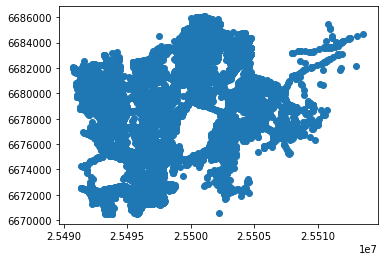

In [2]:
#prepare to convert the road accident data to geodataframe by creating column for geometry
data['geometry'] = None
geom = []
#Going through the data row by row and making point data from the coordinates
for x, y in zip(data['ita_etrs'], data['pohj_etrs']):
    geom.append(Point(x, y))
#Add point data in a list to the geometry column
data['geometry'] = geom

#convert pandas dataframe to geopandas geodataframe
geo = gpd.GeoDataFrame(data, geometry='geometry', crs=CRS.from_epsg(3879).to_wkt())

#See the end result (that i set the coordinates right way)
geo.plot()

In [3]:
#Check if the crs matches
print(geo.crs == roads.crs == grid.crs) #false

#reprojecting the point and road data to be that of the grid data
geo = geo.to_crs(grid.crs)
roads = roads.to_crs(grid.crs)

#second check
print(geo.crs == roads.crs == grid.crs) #true

False
True


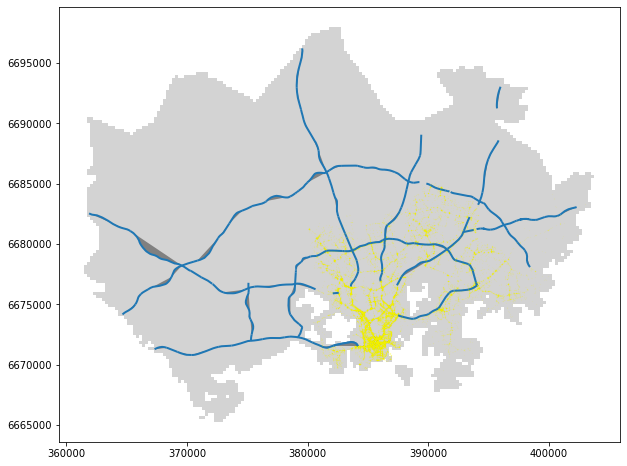

In [4]:
#Start plotting
#Create a subplot
fig, ax = plt.subplots(figsize=(12,8))

grid.plot(ax=ax, facecolor='lightgrey')
roads.plot(ax=ax, facecolor="grey", linewidth=2)
geo.plot(ax=ax, markersize=0.01, color='yellow', alpha=0.25)


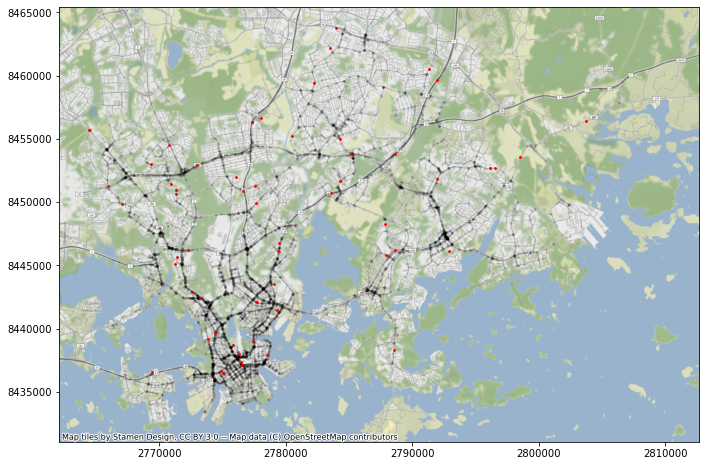

In [5]:
#reproject the car crash data to web mercator for a basemap
geo = geo.to_crs(epsg=3857)

#Here i'm extracting only the crashes from year 2010 and above from the data
crash = geo.loc[(geo['VV'] >= 2010)]
#Here i'm making a separate dataframe from only those crashes, where someone died
vakava = crash.loc[(crash['VAKAV_A'] == 3)]

#plotting the data with the basemap
fig, ax = plt.subplots(figsize=(12,8))
#Here I'm creating a heatmap-ish effect by plotting the points transparently (alpha)
#-> More points, the darker the spot they manifest at is
crash.plot(ax=ax, markersize=3, color="black", alpha=0.03)
vakava.plot(ax=ax, markersize=3, color="red")
ctx.add_basemap(ax)

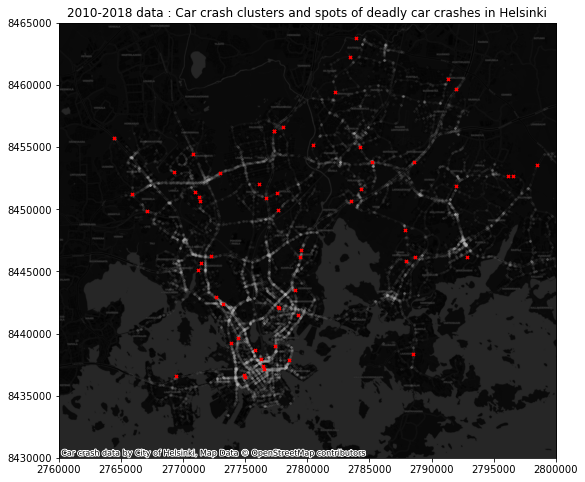

In [6]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

#Change the basemap to dark carto map
carto = 'https://a.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
crash.plot(ax=ax, markersize=3, color="lightgrey", alpha=0.03)
vakava.plot(ax=ax, marker="x", markersize=10, color="red")
#Set the basemap and add credit sources
ctx.add_basemap(ax, attribution="Car crash data by City of Helsinki, Map Data © OpenStreetMap contributors", url=carto)

#Set extent
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8465000)
ax.set_title("2010-2018 data : Car crash clusters and spots of deadly car crashes in Helsinki")

#save the figure as png file
outfp = "docs/static_map.png"
plt.savefig(outfp, dpi=300)

#save the figure as svg file
outfp = "docs/static_map.svg"
plt.savefig(outfp, format='svg')